In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [2]:
!nvidia-smi

Fri Dec 16 16:39:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Preparations

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw3/ex_1'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw3/ex_1
lab3_ex1  lab3_ex1.cu  lab3_ex1_template.cu


### Compiling

In [4]:
!nvcc -arch=sm_75 ./lab3_ex1.cu -o lab3_ex1

### Executing

In [5]:
!./lab3_ex1 123456789

The input length is 123456789.
Data copy (H2D) execution time (in ms): 416.207031.
CUDA Kernel duration of execution time (in ms): 11.312012.
Data copy (D2H) execution time (in ms): 632.788086.
CPU & GPU results are equal.


# Profiling

In [6]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex1 131070

The input length is 131070.
==PROF== Connected to process 344 (/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw3/ex_1/lab3_ex1)
Data copy (H2D) execution time (in ms): 2.200928.
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
CUDA Kernel duration of execution time (in ms): 829.345947.
Data copy (D2H) execution time (in ms): 0.734863.
CPU & GPU results are equal.
==PROF== Disconnected from process 344
[344] lab3_ex1@127.0.0.1
  vecAdd(double*, double*, double*, int), 2022-Dec-16 16:40:47, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.97
    SM Frequency                                                             cycle/usecond                         578.21
    Elapsed Cycles                                                     

# Plotting

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

### Absolute time

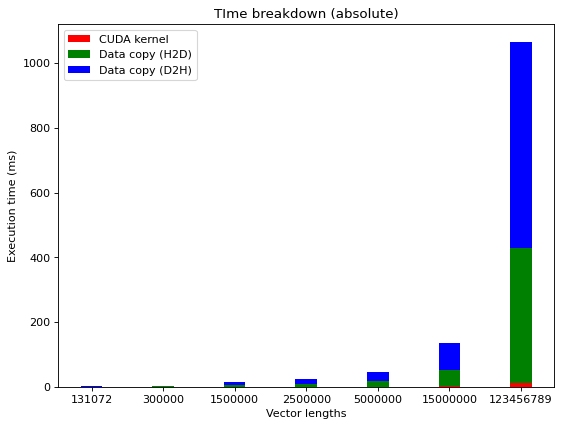

In [8]:
vectors = ['131072', '300000', '1500000', '2500000', '5000000', '15000000', '123456789']

figure(figsize=(8, 6), dpi=80)

time_datacopy_h2d_abs = np.array([0.691162, 1.239990,  5.267822, 8.599121,  17.372070, 50.550049,  415.924805])
time_cuda_kernel_abs = np.array([0.095947,  0.047119,  0.184082, 0.251953,  0.474121,  1.385010,   11.272949])
time_datacopy_d2h_abs = np.array([0.792969, 1.912842,  8.531982, 13.877930, 26.624023, 82.182861,  638.967773])

plt.bar(vectors, time_cuda_kernel_abs, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(vectors, time_datacopy_h2d_abs, bottom=time_cuda_kernel_abs,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(vectors, time_datacopy_d2h_abs, bottom=time_datacopy_h2d_abs+time_cuda_kernel_abs,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (absolute)')
plt.xlabel('Vector lengths')
plt.ylabel('Execution time (ms)')
plt.legend()

### Relative time

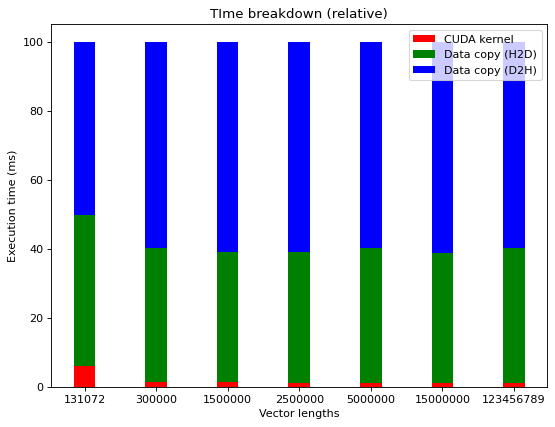

In [9]:
vectors = ['131072', '300000', '1500000', '2500000', '5000000', '15000000', '123456789']

figure(figsize=(8, 6), dpi=80)

time_datacopy_h2d_rel = np.array([43.74, 38.78, 37.64, 37.84, 39.07, 37.69, 39.01])
time_cuda_kernel_rel = np.array([ 6.07,  1.47,  1.32,  1.10,  1.07,  1.04,  1.06])
time_datacopy_d2h_rel = np.array([50.19, 59.74, 61.04, 61.06, 59.87, 61.27,  59.93])


plt.bar(vectors, time_cuda_kernel_rel, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(vectors, time_datacopy_h2d_rel, bottom=time_cuda_kernel_rel,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(vectors, time_datacopy_d2h_rel, bottom=time_datacopy_h2d_rel+time_cuda_kernel_rel,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (relative)')
plt.xlabel('Vector lengths')
plt.ylabel('Execution time (ms)')
plt.legend()